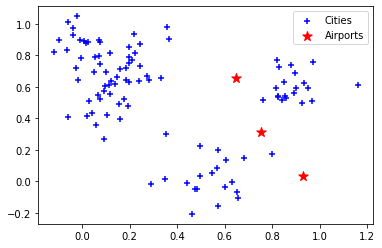

In [38]:
# Group : om kakadiya and vraj dalsania

import random
import numpy as np

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []



# gererating a set of 100 cities (cities' locations will not change)
for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))

# generating initial random locations for 3 airports
for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y)) 

# plotting the initial state
import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt.show()

In [39]:
# creating the distance function which will return the the objective distances from point1 to point 2

def distance(point1, point2):     
  return np.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)
 
# using this num_airports as it would be always 3 for this code but for safe side in future.
num_airports = len(airports) 
# initial distance is always max out then will pick while comparing to it

distances = [float('inf')] * len(cities)  # Initialize distances to infinity

# Creating the objective function here 
def objective(airports, cities):
    value = 0
    # going through the loops of each airports and all cities 
    for i in range(len(airports)):
        closest_cities = set()
        for city in cities:
          # counting the minimu distances from each airport and which ever is closer we can cretae a new airport, delete older  or move there the closet one.
            closest_airport = min(airports, key=lambda x: distance(x, city))
            if closest_airport == airports[i]:
                closest_cities.add(city)
        # /at last for the cities values which can be used at the gradient decent algorithum i am updating each and every values.
        value += sum([(city[0]-airports[i][0])**2 + (city[1]-airports[i][1])**2 for city in closest_cities])
    return value



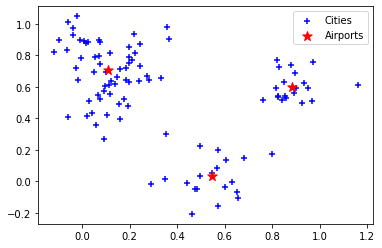

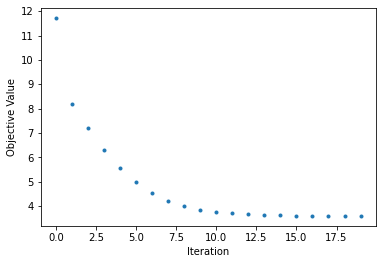

In [40]:
# gradient descent algorithm to optimize the objective function
alpha = 0.01 # learning rate
num_iter = 20 # number of iterations as per class notes from professor kate 
obe_val = []
for i in range(num_iter):
  # dividing into steps to get better understanding of the algo
  # firstly running throught the 20 loos as requested by prof.
    gradients = []
    for j in range(num_air):
      # looping through each airoprt
        gradient = [0, 0]
        for city in cities:
          # going through each citi finding the nearest airport
            closest_airport = min(airports, key=lambda x: distance(x, city))
            if closest_airport == airports[j]:
              # if closet airport is the one that we have in loop then we will cheange the location i mean will update
                gradient[0] += (airports[j][0]-city[0])
                gradient[1] += (airports[j][1]-city[1])
                # we will give new cordinates
        gradients.append(gradient)
        # going through all three airports to get the locations from one single array gradients
    for j in range(num_air):
        airports[j] = (airports[j][0]-alpha*gradients[j][0], airports[j][1]-alpha*gradients[j][1])
    obj_value = objective(airports, cities)
    # .updating the objective values which will decrease wach eateration and we can confirm by seeing at the graph plotting.
    obe_val.append(obj_value)


# plot the final state
zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt.show()
# plotting the dotted graph as requested 

plt.plot(range(num_iter), obe_val, '.')
plt.xlabel('Iteration')
plt.ylabel('Objective Value')
plt.show()


